# K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.cluster import KMeans
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
wcss = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

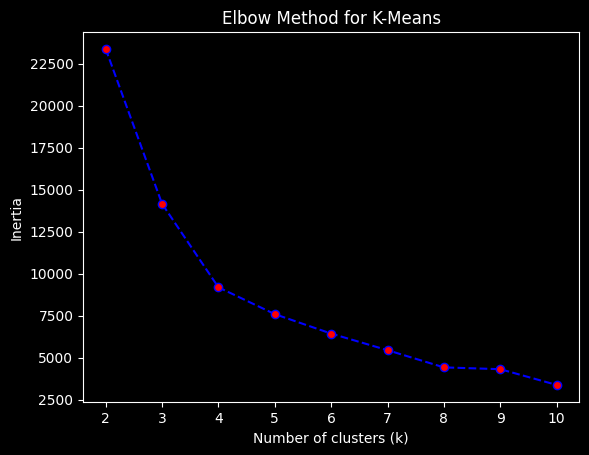

In [4]:
plt.plot(
    range(2, 11),
    wcss,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

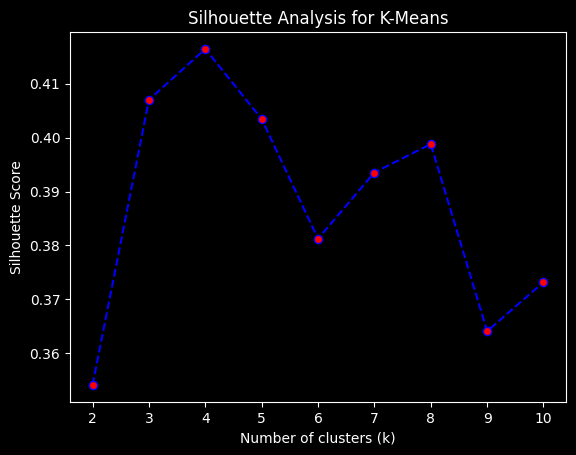

In [5]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.show()

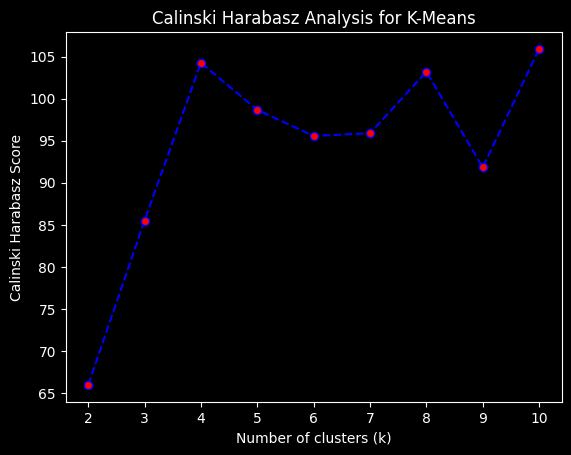

In [6]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for K-Means")
plt.show()

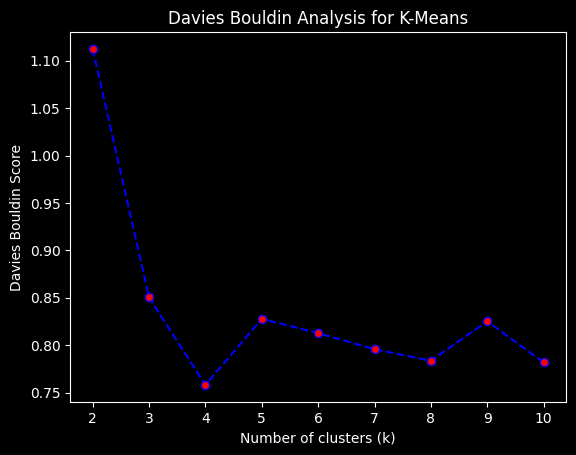

In [7]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for K-Means")
plt.show()

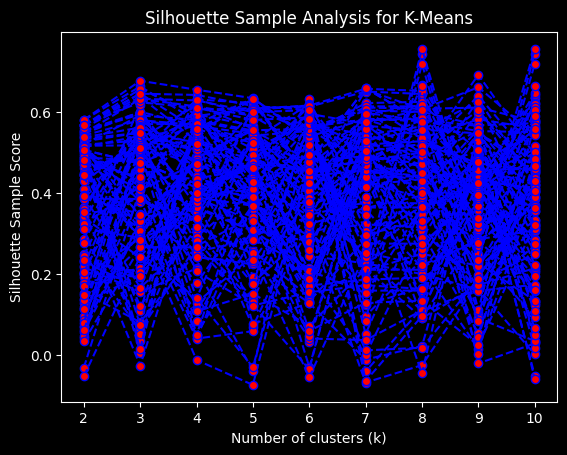

In [8]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for K-Means")
plt.show()

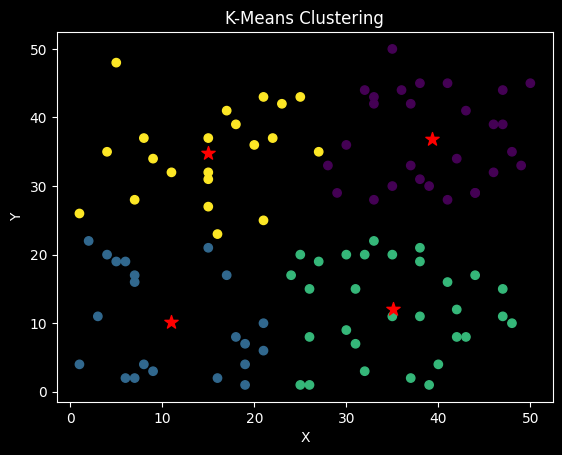

In [9]:
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker=MarkerStyle("*"), c="red", s=100)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
print("WCSS (Inertia) :", kmeans.inertia_)
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

WCSS (Inertia) : 9187.35238095238
Silhouette Score : 0.4164480858030115
Calinski Harabasz Score : 104.26496384263254
Davies Bouldin Score : 0.7580280738618597
Silhouette Samples : [ 0.42936894  0.47525038  0.59981144  0.48738636  0.48566212  0.12926409
  0.58007433  0.52835586 -0.01206905  0.56750732  0.36240983  0.63091199
  0.5599574   0.58948081  0.24193147  0.57739413  0.43709216  0.47499515
  0.64197899  0.30406231  0.42331096  0.5942852   0.4799357   0.0501619
  0.60539855  0.21385678  0.65488417  0.43642835  0.27607787  0.57085504
  0.56540136  0.57076319  0.30627139  0.50624579  0.61674597  0.34990589
  0.41218579  0.58315346  0.38913927  0.0413344   0.29223811  0.33891258
  0.58961061  0.63079666  0.33877629  0.52512537  0.11244103  0.41154868
  0.37686093  0.21359775  0.50682944  0.51341879  0.38778235  0.38491903
  0.59008938  0.61360719  0.33805529  0.39950251  0.25570863  0.56765782
  0.14120752  0.44120865  0.31497498  0.46821318  0.36590647  0.57957336
  0.20636882  0.28

In [11]:
dump(kmeans, "../../../Models/kMeansClustering.joblib")

['../../../Models/kMeansClustering.joblib']